In [ ]:
from numpy import unique # For finding unique elements
from numpy import argmax  # For finding the index of the maximum value
from pandas import read_csv  # For reading data from CSV files into DataFrames
from tensorflow.keras.models import Sequential  # For creating a sequential neural network model
from tensorflow.keras.layers import Dense  # For creating fully connected neural network layers
from sklearn.metrics import accuracy_score  # For calculating classification accuracy
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define the URL to the dataset CSV file
url = 'dataset.csv'

# Read the CSV file into a DataFrame without considering the first row as headers
dataframe = read_csv(url, header=None)


# Extract the values from the DataFrame and store them in a variable 'dataset'
#dataset = dataframe.values

# The code reads a dataset from a CSV file and stores it in the 'dataset' variable for further processing.

In [ ]:
dataframe.head()#Samples of Data

,0,1,2,3,4,5,6,7,8,9
0,0.063094,0.390562,1.571427,-58.515457,-9.428294,11.790896,5.008872,-26.301874,30.542972,1
1,0.074649,-0.157481,0.958330,1.702279,-6.904296,-27.892683,2.161393,-21.268899,33.983140,1
2,-0.113500,0.095557,1.018073,0.896224,-6.254275,-10.133861,3.285302,-21.938269,22.097793,1
3,0.039250,-0.156121,0.896122,-0.482265,-5.217253,40.921852,1.206292,-19.442905,15.152716,1
4,-0.104266,-0.102749,1.063787,2.421552,-7.050641,-60.904564,0.070042,-21.473195,3.747143,1


In [ ]:
acc = dataframe.iloc[:,[0,1,2,9]].values  #Get Acceleration sensor data
gyr = dataframe.iloc[:,[3,4,5,9]].values  #Get Gyroscope sensor data
mag = dataframe.iloc[:,[6,7,8,9]].values  #Get Magnetometer sensor data
dataset = np.vstack((acc, gyr, mag))      #Stack the data
dataset.shape   #Check the shape of the data

(30114, 4)

In [ ]:
# Split the dataset into features (X) and labels (y)
X, y = dataset[:, 0:-1], dataset[:, -1]

# Convert the feature and label data to float data type
X, y = X.astype('float'), y.astype('float')

# In this code block, the dataset is split into two arrays:
# - X: The feature array containing all columns except the last one (input data)
# - y: The label array containing only the last column (output or target data)
# The '.astype('float')' method is used to ensure that both X and y contain float data types.

In [ ]:
# Determine the number of features (columns) in the input data
n_features = X.shape[1]

In [ ]:
# Encode the target labels into numerical values
y = LabelEncoder().fit_transform(y)

# Calculate the number of unique classes in the target labels
n_class = len(unique(y))

# 'y' now contains encoded target labels, and 'n_class' represents the count of unique classes.

In [ ]:
y#Visualizing labels

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
# Split the dataset into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.4, random_state=1)

# Further split the evaluation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=1)


In [ ]:
X_train.shape, X_val.shape, X_test.shape  #Checking data split

((18068, 3), (6023, 3), (6023, 3))

In [ ]:
y_train   #Check train lables

array([3, 2, 3, ..., 3, 0, 4])

# Model creation

# With ReLU activation

In [ ]:
def model_training(activation):
  # Create a sequential model
    model = Sequential()
    # Add the input layer with 12 units and specified activation function
    model.add(Dense(12, input_dim=n_features, activation=activation, kernel_initializer='he_normal'))
    # Add a hidden layer with 9 units and the same activation function
    model.add(Dense(9, activation=activation, kernel_initializer='he_normal'))
    # Add a hidden layer with 9 units and the same activation function
    model.add(Dense(9, activation=activation, kernel_initializer='he_normal'))
    # Add the output layer with 'n_class' units and softmax activation
    model.add(Dense(n_class, activation='softmax'))
    # Compile the model with sparse categorical cross-entropy loss and Adam optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

    # Set the number of training epochs
    epochs = 100

    # Initialize lists to store training and validation losses
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
    # Fit the model on the training data for one epoch
        model.fit(X_train, y_train, epochs=1, batch_size=10, verbose=0)

        # Evaluate the model on the training data
        train_scores = model.evaluate(X_train, y_train, verbose=0)
        train_loss = train_scores

        # Evaluate the model on the validation data
        val_scores = model.evaluate(X_val, y_val, verbose=0)
        val_loss = val_scores

        # Print and record both training and validation scores
        print(f"----------  Epoch {epoch+1}/{epochs}  -----------")
        print(f"Training : {train_loss:.5f} | Validation : {val_loss:.5f}")

        train_losses.append(train_loss)
        val_losses.append(val_loss)
 # Return the trained model and the lists of training and validation losses
    return model, train_losses, val_losses

In [ ]:
model_relu, train_losses, val_losses = model_training('relu')
# Train the model with ReLU activation

----------  Epoch 1/100  -----------
Training : 1.43238 | Validation : 1.43640
----------  Epoch 2/100  -----------
Training : 1.37203 | Validation : 1.38938
----------  Epoch 3/100  -----------
Training : 1.32130 | Validation : 1.33163
----------  Epoch 4/100  -----------
Training : 1.25365 | Validation : 1.26930
----------  Epoch 5/100  -----------
Training : 1.18177 | Validation : 1.20234
----------  Epoch 6/100  -----------
Training : 1.12886 | Validation : 1.15354
----------  Epoch 7/100  -----------
Training : 1.09879 | Validation : 1.12564
----------  Epoch 8/100  -----------
Training : 1.07228 | Validation : 1.10045
----------  Epoch 9/100  -----------
Training : 1.05033 | Validation : 1.07325
----------  Epoch 10/100  -----------
Training : 1.03325 | Validation : 1.05499
----------  Epoch 11/100  -----------
Training : 1.02316 | Validation : 1.04772
----------  Epoch 12/100  -----------
Training : 1.01196 | Validation : 1.03298
----------  Epoch 13/100  -----------
Training : 

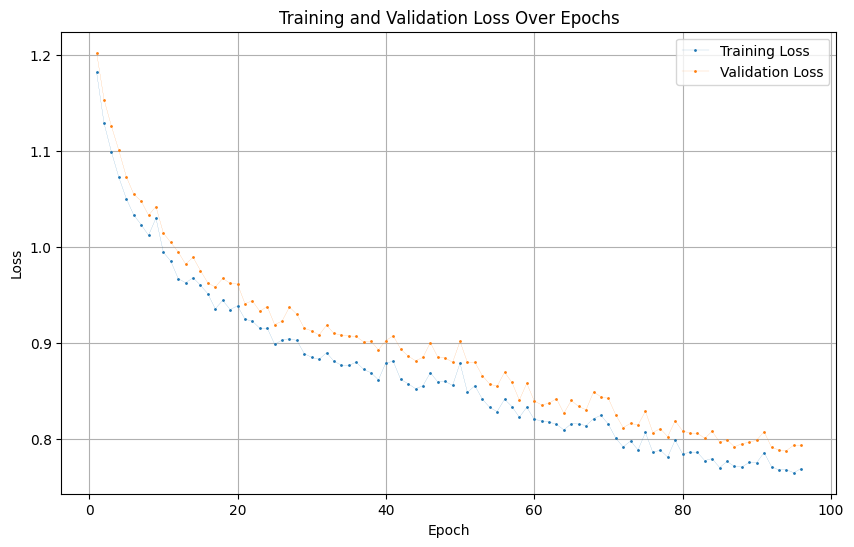

In [ ]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    # Assuming 'evaluation' is a list of tuples with (train_loss, val_loss)
    # train_losses, val_losses = zip(*evaluation)

    # Remove the first 4 epochs (for better visualization)
    train_losses = train_losses[4:]
    val_losses = val_losses[4:]
    # Create a plot for training and validation losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o', linewidth=0.1, markersize=1.0)
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='o', linewidth=0.1, markersize=1.0)

    plt.title('Training and Validation Loss Over Epochs')  # Set the title of the plot
    plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
    plt.ylabel('Loss')  # Label the y-axis as 'Loss'
    plt.legend()  # Display a legend for the two lines
    plt.grid(True)  # Add a grid to the plot
    plt.show()  # Show the plot

# Plot training and validation losses
plot_losses(train_losses, val_losses)  # Call the plot_losses function with the provided loss data

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


def get_classification_metrics(model, X_data, y_data):

    # Assuming y_true contains the true class labels and y_pred is the predicted labels from Step 7
    # Calculate the confusion matrix
    y_pred = model.predict(X_data) # Predict labels using the trained model
    y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
    confusion_matrix_ = confusion_matrix(y_data, y_pred) # Calculate the confusion matrix

    # Calculate classification accuracy
    accuracy = accuracy_score(y_data, y_pred)  # Calculate accuracy by comparing true and predicted labels

    # Print the confusion matrix and accuracy for Step 7
    print("Confusion Matrix :\n", confusion_matrix_)
    print("Accuracy :", accuracy)

    # Generate a classification report
    report = classification_report(y_data, y_pred) # Generate a classification report with precision, recall, F1-score, and support
    print(report)

In [ ]:
get_classification_metrics(model_relu, X_test, y_test)

189/189 [==============================] - 0s 1ms/step
Confusion Matrix :
 [[ 727  107   75   68   16]
 [  91 1051   80   68   26]
 [  32  113 1271   86   64]
 [  46   68   63  935   61]
 [ 105  111  130  244  385]]
Accuracy : 0.7253860202556865
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       993
           1       0.72      0.80      0.76      1316
           2       0.79      0.81      0.80      1566
           3       0.67      0.80      0.73      1173
           4       0.70      0.39      0.50       975

    accuracy                           0.73      6023
   macro avg       0.72      0.71      0.70      6023
weighted avg       0.73      0.73      0.72      6023



# TF lite model conversion

In [ ]:
import tensorflow as tf

# Convert the model to TensorFlow Lite format
# converter = tf.lite.TFLiteConverter.from_keras_model(model_relu)
# tflite_model = converter.convert()

# # Save the TensorFlow Lite model to a file
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_relu)
tflite_model = converter.convert()

open("model.tflite",'wb').write(tflite_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_relu) #Indicate that we want to perform the default optimizations,
#which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT] # Define a generator function that provides our test data's x values # as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in X_test:
    #Each scalar value must be inside of a 20 array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator # Convert the model
tflite_model = converter.convert()
# Save the model to disk
open("model_quantized.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


4136

In [ ]:
model = tf.lite.Interpreter('model.tflite')
model_quantized = tf.lite.Interpreter('model_quantized.tflite')
# Allocate memory for each model
model.allocate_tensors()
model_quantized.allocate_tensors()
# Get indexes of the input and output tensors
model_input_index = model.get_input_details()[0]["index"]
model_output_index = model.get_output_details()[0]["index"]
model_quantized_input_index = model_quantized.get_input_details()[0] ["index"]
model_quantized_output_index = model_quantized.get_output_details()[0]["index"]
# Create arrays to store the results
model_predictions = []
model_quantized_predictions = []
# Run each model's interpreter for each value and store the results in arrays
for x_value in X_test:
# Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
#Write the value to the input tensor
model.set_tensor(model_input_index, x_value_tensor)
# Run inference
model.invoke()
# Read the prediction from the output tensor

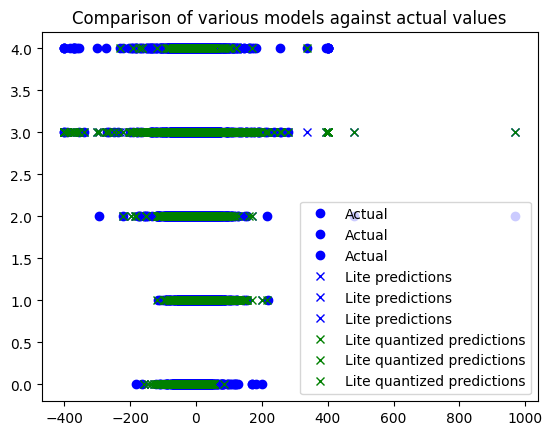

In [ ]:
import matplotlib.pyplot as plt
model = tf.lite.Interpreter('model.tflite')
model_quantized = tf.lite.Interpreter('model_quantized.tflite')
#Allocate memory for each model
model.allocate_tensors()
model_quantized.allocate_tensors()
# Get indexes of the input and output tensors
model_input_index = model.get_input_details()[0]["index"]
model_output_index = model.get_output_details()[0]["index"]
model_quantized_input_index = model_quantized.get_input_details()[0]["index"]
model_quantized_output_index = model_quantized.get_output_details()[0]["index"]
# Create arrays to store the results
model_predictions = []
model_quantized_predictions = []
# Run each model's interpreter for each value and store the results in arrays
for x_value in X_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([x_value], dtype=np.float32)
  # Write the value to the input tensor
  model.set_tensor(model_input_index, x_value_tensor)
  model.invoke()
  model_predictions.append(model.get_tensor(model_output_index)[0])
  # Do the same for the quantized model
  model_quantized.set_tensor(model_quantized_input_index, x_value_tensor)
  model_quantized.invoke()
  model_quantized_predictions.append(model_quantized.get_tensor(model_quantized_output_index)[0])
# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(X_test, y_test, 'bo', label='Actual')
#plt.plot(X_test, predictions, 'ro', label='Original predictions')
plt.plot(X_test, np.argmax(model_predictions, axis=1), 'bx', label='Lite predictions')
plt.plot(X_test, np.argmax(model_quantized_predictions, axis=1), 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()
# Run inference
# Read the prediction from the output tensor

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


confusion_matrix = confusion_matrix(y_test, np.argmax(model_predictions, axis=1)) # Calculate the confusion matrix

# Calculate classification accuracy
accuracy = accuracy_score(y_test, np.argmax(model_predictions, axis=1))  # Calculate accuracy by comparing true and predicted labels

# Print the confusion matrix and accuracy for Step 7
print("Confusion Matrix :\n", confusion_matrix)
print("Accuracy :", accuracy)

    # Generate a classification report
report = classification_report(y_test, np.argmax(model_predictions, axis=1)) # Generate a classification report with precision, recall, F1-score, and support
print(report)

Confusion Matrix :
 [[ 734  114   80   49   16]
 [  80 1054   98   66   18]
 [  31  116 1276   90   53]
 [  36   73   66  937   61]
 [ 100  111  147  275  342]]
Accuracy : 0.7210692346006973
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       993
           1       0.72      0.80      0.76      1316
           2       0.77      0.81      0.79      1566
           3       0.66      0.80      0.72      1173
           4       0.70      0.35      0.47       975

    accuracy                           0.72      6023
   macro avg       0.72      0.70      0.70      6023
weighted avg       0.72      0.72      0.71      6023



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


confusion_matrix = confusion_matrix(y_test, np.argmax(model_quantized_predictions, axis=1)) # Calculate the confusion matrix

# Calculate classification accuracy
accuracy = accuracy_score(y_test, np.argmax(model_quantized_predictions, axis=1))  # Calculate accuracy by comparing true and predicted labels

# Print the confusion matrix and accuracy for Step 7
print("Confusion Matrix :\n", confusion_matrix)
print("Accuracy :", accuracy)

    # Generate a classification report
report = classification_report(y_test, np.argmax(model_quantized_predictions, axis=1)) # Generate a classification report with precision, recall, F1-score, and support
print(report)

Confusion Matrix :
 [[374 124 101  33 361]
 [ 96 621  89  39 471]
 [ 65 139 718  76 568]
 [ 46 101  82 497 447]
 [100 125 147 222 381]]
Accuracy : 0.4301842935414245
              precision    recall  f1-score   support

           0       0.55      0.38      0.45       993
           1       0.56      0.47      0.51      1316
           2       0.63      0.46      0.53      1566
           3       0.57      0.42      0.49      1173
           4       0.17      0.39      0.24       975

    accuracy                           0.43      6023
   macro avg       0.50      0.42      0.44      6023
weighted avg       0.52      0.43      0.46      6023



# Converting to Assembly

In [ ]:
!apt-get -qq install xxd

In [ ]:
!xxd -i /content/model.tflite > /content/model.cc

In [ ]:
!cat model.cc

unsigned char _content_model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x98, 0x00, 0x00, 0x00, 0xf0, 0x00, 0x00, 0x00, 0x68, 0x0b, 0x00, 0x00,
  0x78, 0x0b, 0x00, 0x00, 0xd4, 0x12, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x90, 0xff, 0xff, 0xff, 0x0d, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x31, 0x31, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x